<a href="https://colab.research.google.com/github/lorransr/text-mining-reclame-aqui/blob/develop/k_means_example_reclame_aqui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install texthero

In [2]:
import pandas as pd
import texthero as hero
import plotly.express as px
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt
import numpy as np

## KMeans Para Mineração de Dados

Antes de explorar esse exemplo, sugiro confirir esses excelente post interativo a respeito do método KMeans:

[Link do post](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

## Cenário

Diariamente o portal de reclamações (Reclame Aqui) recebe centenas de registros de consumidores, frustrados e irritados a respeito dos serviços prestados por empresas de todo o país. 

Uma empresa grande deve tratar centenas de mensagens em um tempo curto, de forma a galgar um espaço de prestígio no imaginário do consumidor.

Uma forma de tornar o atendimento das demandas que chegam de forma escrita de texto e não estruturada, seria agrupar as mensagens por tópicos semelhantes, e dimensionar uma fila de atendimento específica para cada problema.

Assim sendo. Nossa missão é encontrar esses grupos em meio as mensagens deixadas no portal, para que assim seja possivel dimensionar o time de atendimento por tópicos específicos.

In [3]:
data_url = 'https://raw.githubusercontent.com/lorransr/text-mining-reclame-aqui/develop/claro_complaints.csv'

In [4]:
df_claro = pd.read_csv(data_url	)

In [5]:
df_claro.texto

0     Me ligaram ofrecendo portabilidade. Mas enviar...
1     Tentei cancelar duas linhas pelo telefone na C...
2     Meu nome é Italo Vinicius Mendes Ferreira. Sou...
3     Passaram a descontar dos meus Créditos 1,49 to...
4     ANOTEM ! Esta é a TERCEIRA e ÚLTIMA vez que es...
                            ...                        
91    Em abril de 2019, fui ao Shopping Morumbi comp...
92    vários protocolos de retirada de equipamento.\...
93    Eu acidentalmente bloqueei meu número sem quer...
94    Realizei o acordo as parcelas do meu plano da ...
95    Meu pai, um senhor idoso foi enrolado pela tel...
Name: texto, Length: 96, dtype: object

# Data Preparation

In [6]:
portuguese_stop_words = [ 'a', 'à', 'adeus',"né", 'agora', 'aí', 'ainda', 'além', 'algo', 'alguém', 'algum', 'alguma', 'algumas', 'alguns', 'ali', 'ampla', 'amplas', 'amplo', 'amplos', 'ano', 'anos', 'ante', 'antes', 'ao', 'aos', 'apenas', 'apoio', 'após', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aqui', 'aquilo', 'área', 'as', 'às', 'assim', 'até', 'atrás', 'através', 'baixo', 'bastante', 'bem', 'boa', 'boas', 'bom', 'bons', 'breve', 'cá', 'cada', 'catorze', 'cedo', 'cento', 'certamente', 'certeza', 'cima', 'cinco', 'coisa', 'coisas', 'com', 'como', 'conselho', 'contra', 'contudo', 'custa', 'da', 'dá', 'dão', 'daquela', 'daquelas', 'daquele', 'daqueles', 'dar', 'das', 'de', 'debaixo', 'dela', 'delas', 'dele', 'deles', 'demais', 'dentro', 'depois', 'desde', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'destas', 'deste', 'destes', 'deve', 'devem', 'devendo', 'dever', 'deverá', 'deverão', 'deveria', 'deveriam', 'devia', 'deviam', 'dez', 'dezanove', 'dezasseis', 'dezassete', 'dezoito', 'dia', 'diante', 'disse', 'disso', 'disto', 'dito', 'diz', 'dizem', 'dizer', 'do', 'dois', 'dos', 'doze', 'duas', 'dúvida', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'embora', 'enquanto', 'entre', 'era', 'eram', 'éramos', 'és', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estás', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estiveste', 'estivestes', 'estou', 'etc', 'eu', 'exemplo', 'faço', 'falta', 'favor', 'faz', 'fazeis', 'fazem', 'fazemos', 'fazendo', 'fazer', 'fazes', 'feita', 'feitas', 'feito', 'feitos', 'fez', 'fim', 'final', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'forma', 'formos', 'fosse', 'fossem', 'fôssemos', 'foste', 'fostes', 'fui', 'geral', 'grande', 'grandes', 'grupo', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'havia', 'hei', 'hoje', 'hora', 'horas', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvéssemos', 'isso', 'isto', 'já', 'la', 'lá', 'lado', 'lhe', 'lhes', 'lo', 'local', 'logo', 'longe', 'lugar', 'maior', 'maioria', 'mais', 'mal', 'mas', 'máximo', 'me', 'meio', 'menor', 'menos', 'mês', 'meses', 'mesma', 'mesmas', 'mesmo', 'mesmos', 'meu', 'meus', 'mil', 'minha', 'minhas', 'momento', 'muita', 'muitas', 'muito', 'muitos', 'na', 'nada', 'não', 'naquela', 'naquelas', 'naquele', 'naqueles', 'nas', 'nem', 'nenhum', 'nenhuma', 'nessa', 'nessas', 'nesse', 'nesses', 'nesta', 'nestas', 'neste', 'nestes', 'ninguém', 'nível', 'no', 'noite', 'nome', 'nos', 'nós', 'nossa', 'nossas', 'nosso', 'nossos', 'nova', 'novas', 'nove', 'novo', 'novos', 'num', 'numa', 'número', 'nunca', 'o', 'obra', 'obrigada', 'obrigado', 'oitava', 'oitavo', 'oito', 'onde', 'ontem', 'onze', 'os', 'ou', 'outra', 'outras', 'outro', 'outros', 'para', 'parece', 'parte', 'partir', 'paucas', 'pela', 'pelas', 'pelo', 'pelos', 'pequena', 'pequenas', 'pequeno', 'pequenos', 'per', 'perante', 'perto', 'pode', 'pude', 'pôde', 'podem', 'podendo', 'poder', 'poderia', 'poderiam', 'podia', 'podiam', 'põe', 'põem', 'pois', 'ponto', 'pontos', 'por', 'porém', 'porque', 'porquê', 'posição', 'possível', 'possivelmente', 'posso', 'pouca', 'poucas', 'pouco', 'poucos', 'primeira', 'primeiras', 'primeiro', 'primeiros', 'própria', 'próprias', 'próprio', 'próprios', 'próxima', 'próximas', 'próximo', 'próximos', 'pude', 'puderam', 'quais', 'quáis', 'qual', 'quando', 'quanto', 'quantos', 'quarta', 'quarto', 'quatro', 'que', 'quê', 'quem', 'quer', 'quereis', 'querem', 'queremas', 'queres', 'quero', 'questão', 'quinta', 'quinto', 'quinze', 'relação', 'sabe', 'sabem', 'são', 'se', 'segunda', 'segundo', 'sei', 'seis', 'seja', 'sejam', 'sejamos', 'sem', 'sempre', 'sendo', 'ser', 'será', 'serão', 'serei', 'seremos', 'seria', 'seriam', 'seríamos', 'sete', 'sétima', 'sétimo', 'seu', 'seus', 'sexta', 'sexto', 'si', 'sido', 'sim', 'sistema', 'só', 'sob', 'sobre', 'sois', 'somos', 'sou', 'sua', 'suas', 'tal', 'talvez', 'também', 'tampouco', 'tanta', 'tantas', 'tanto', 'tão', 'tarde', 'te', 'tem', 'tém', 'têm', 'temos', 'tendes', 'tendo', 'tenha', 'tenham', 'tenhamos', 'tenho', 'tens', 'ter', 'terá', 'terão', 'terceira', 'terceiro', 'terei', 'teremos', 'teria', 'teriam', 'teríamos', 'teu', 'teus', 'teve', 'ti', 'tido', 'tinha', 'tinham', 'tínhamos', 'tive', 'tivemos', 'tiver', 'tivera', 'tiveram', 'tivéramos', 'tiverem', 'tivermos', 'tivesse', 'tivessem', 'tivéssemos', 'tiveste', 'tivestes', 'toda', 'todas', 'todavia', 'todo', 'todos', 'trabalho', 'três', 'treze', 'tu', 'tua', 'tuas', 'tudo', 'última', 'últimas', 'último', 'últimos', 'um', 'uma', 'umas', 'uns', 'vai', 'vais', 'vão', 'vários', 'vem', 'vêm', 'vendo', 'vens', 'ver', 'vez', 'vezes', 'viagem', 'vindo', 'vinte', 'vir', 'você', 'vocês', 'vos', 'vós', 'vossa', 'vossas', 'vosso', 'vossos', 'zero', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '_' ]
extra_words = ["claro"]

In [7]:
df_claro["texto_processed"] = (df_claro.texto
 .pipe(hero.lowercase)
 .pipe(hero.remove_stopwords,stopwords = portuguese_stop_words + extra_words)
 .pipe(hero.remove_diacritics)
 .pipe(hero.remove_punctuation)
 .pipe(hero.remove_digits)
 .pipe(hero.remove_whitespace)
 )

df_claro["texto_stemmed"]=(df_claro.texto_processed
 .pipe(hero.stem,language="portuguese"))

In [8]:
df_claro.iloc[0,1]

'Me ligaram ofrecendo portabilidade. Mas enviaram um chip que não funciona. Ja fiz tudo o que eu podia para obter rede porém o chip nao funciona. Absurdo. Vou voltar para Tim. Fazer o que né?!'

In [9]:
df_claro.iloc[0,2]

'ligaram ofrecendo portabilidade enviaram chip funciona ja fiz obter rede chip nao funciona absurdo vou voltar tim'

In [10]:
df_claro.iloc[0,3]

'lig ofrec portabil envi chip funcion ja fiz obter red chip nao funcion absurd vou volt tim'

## Modeling

### TF-IDF - Term frequency - Inverse Document Frequency

- é uma forma de medir o quão importante uma palavra é para um documento.

> **TF** -> mede a frequencia em que o termo aparece 

> **IDF** -> mede a importância de um termpo no texto (Número de Documentos que contêm o termo)


### PCA
- Técnica de redução de dimensionalidade
- [Explicação](https://setosa.io/ev/principal-component-analysis/)

In [11]:
df_claro["pca"] = (df_claro.texto_stemmed
 .pipe(hero.tfidf)
 .pipe(hero.pca)
 )

In [12]:
df_claro.loc[:,["pca_1","pca_2"]] = pd.DataFrame(df_claro.pca.to_list()).values

In [13]:
hero.scatterplot(df_claro,"pca")

In [14]:
distortions = [] #medias das distancias dos pontos aos centros dos clusters
inertias = [] #soma dos quadrados das distancias dos pontos até o centro do respectivo cluster
K = range(1,10) 
X = df_claro[["pca_1","pca_2"]].values
  
for k in K: 
    #Building and fitting the model 
    kmeans = KMeans(n_clusters=k).fit(X) 
    kmeans.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeans.inertia_) 

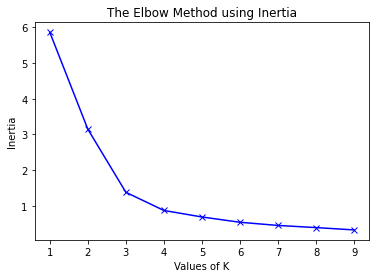

In [15]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [16]:
kmeans = KMeans(3,random_state=42)
df_claro["clusters"] = kmeans.fit_predict(X).astype("str")

In [17]:
px.scatter(df_claro,x = "pca_1",y="pca_2",color="clusters")

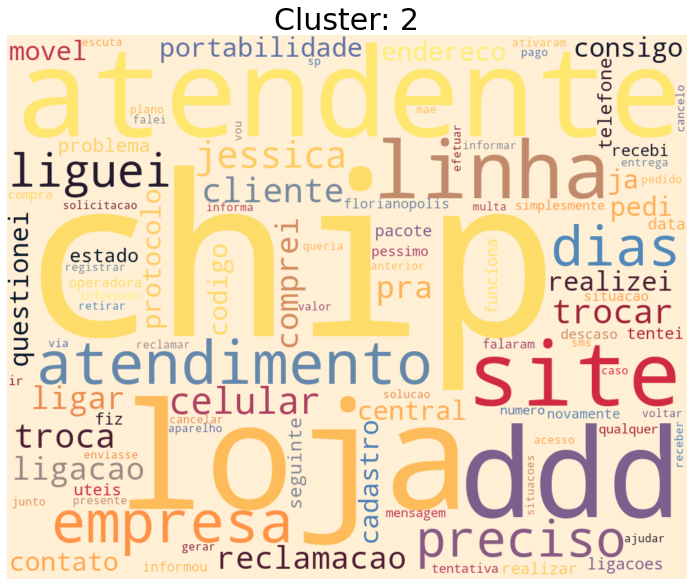

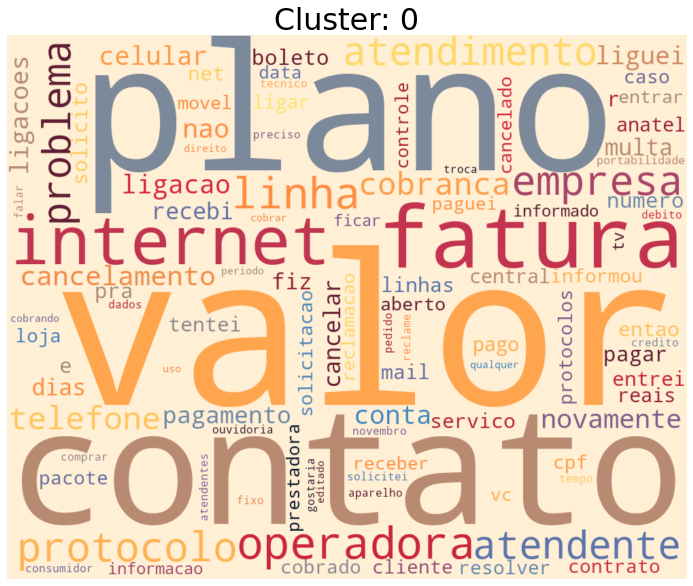

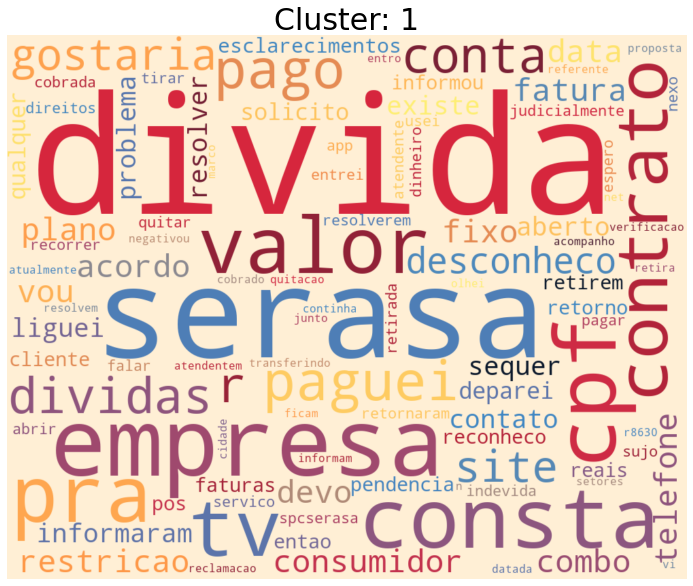

In [18]:
for c in df_claro.clusters.unique():
  filter_cluster = df_claro.clusters==c
  hero.wordcloud(df_claro.loc[filter_cluster,"texto_processed"],max_words=100,width=1000,height=800)
  plt.title("Cluster: {}".format(c),{'fontsize':30})

In [19]:
df_claro.groupby("clusters")["texto"].count()

clusters
0    68
1    15
2    13
Name: texto, dtype: int64